## Redefining Cancer Treatment

### DataSet  Overview:-



In [1]:
#importing modules
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Training Part

In [2]:
training_variants=pd.read_csv('training_variants')

In [3]:
training_variants.head(3)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2


In [4]:
training_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [5]:
training_text=pd.read_csv('training_text',sep='\|\|',header=None,names=['ID','Text'],skiprows=1)

In [6]:
training_text

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...
3316,3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,The Runt-related transcription factor 1 gene (...
3319,3319,The RUNX1/AML1 gene is the most frequent targe...


In [7]:
training_text.duplicated().any()#checking for duplicate values

False

In [8]:
training_text.info()#as we can see their are 5 missing values present in Text

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
ID      3321 non-null int64
Text    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [9]:
training_text.dropna(inplace=True)

In [10]:
training_text.info()#checking for null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 2 columns):
ID      3316 non-null int64
Text    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 77.7+ KB


### joining Training files

In [11]:
df_train=pd.merge(training_variants,training_text,on='ID',how='left')#merging  training part

In [12]:
df_train

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...


In [13]:
df_train.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
Text         5
dtype: int64

In [14]:
df_train.dropna(inplace=True)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 5 columns):
ID           3316 non-null int64
Gene         3316 non-null object
Variation    3316 non-null object
Class        3316 non-null int64
Text         3316 non-null object
dtypes: int64(2), object(3)
memory usage: 155.4+ KB


In [16]:
df_train.describe(include='all')

,ID,Gene,Variation,Class,Text
count,3316.000000,3316,3316,3316.000000,3316
unique,NaN,262,2993,NaN,1920
top,NaN,BRCA1,Truncating Mutations,NaN,The PTEN (phosphatase and tensin homolog) phos...
freq,NaN,264,92,NaN,53
mean,1660.034077,NaN,NaN,4.366104,NaN
std,959.287860,NaN,NaN,2.309241,NaN
min,0.000000,NaN,NaN,1.000000,NaN
25%,828.750000,NaN,NaN,2.000000,NaN
50%,1661.500000,NaN,NaN,4.000000,NaN
75%,2490.250000,NaN,NaN,7.000000,NaN


We find:-

There are 3316 different IDs in the training set containing 262 different Gene expressions with 2993 different Variations. 
There are 9 different Classes indicated by integer levels.

The Gene and Variation features contain character strings of various lengths


## Testing Part

In [17]:
test_variants=pd.read_csv('test_variants')

In [18]:
test_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 3 columns):
ID           5668 non-null int64
Gene         5668 non-null object
Variation    5668 non-null object
dtypes: int64(1), object(2)
memory usage: 133.0+ KB


In [19]:
test_variants

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A
...,...,...,...
5663,5663,SLC46A1,R113S
5664,5664,FOXC1,L130F
5665,5665,GSS,R267W
5666,5666,CTSK,G79E


In [20]:
test_text=pd.read_csv('test_text',sep='\|\|',header=None,names=['ID','Text'],skiprows=1)

In [21]:
test_text

,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...
...,...,...
5663,5663,The realization in the late 1970s that RAS har...
5664,5664,Hemizygous deletions are common molecular abno...
5665,5665,All most R267W of has with to SMARTpool invest...
5666,5666,Abstract Blood samples from 125 unrelated fami...


In [22]:
test_text.isnull().sum()

ID      0
Text    1
dtype: int64

In [23]:
test_text.dropna(inplace=True)

In [24]:
test_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667 entries, 0 to 5667
Data columns (total 2 columns):
ID      5667 non-null int64
Text    5667 non-null object
dtypes: int64(1), object(1)
memory usage: 132.8+ KB


## Combining two test files

In [175]:
df_test=pd.merge(test_variants,test_text,on='ID',how='left')

In [26]:
df_test.info()#here we can see there one missing values present in Text

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5668 entries, 0 to 5667
Data columns (total 4 columns):
ID           5668 non-null int64
Gene         5668 non-null object
Variation    5668 non-null object
Text         5667 non-null object
dtypes: int64(1), object(3)
memory usage: 221.4+ KB


In [176]:
df_test.dropna(inplace=True)

In [177]:
df_test.isnull().sum()

ID           0
Gene         0
Variation    0
Text         0
dtype: int64

In [29]:
df_test.head(3)

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...


In [30]:
df_train.head(3)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...


In [31]:
df_train.shape

(3316, 5)

In [32]:
df_test.shape

(5667, 4)

## Visualization

In [33]:
df_train.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

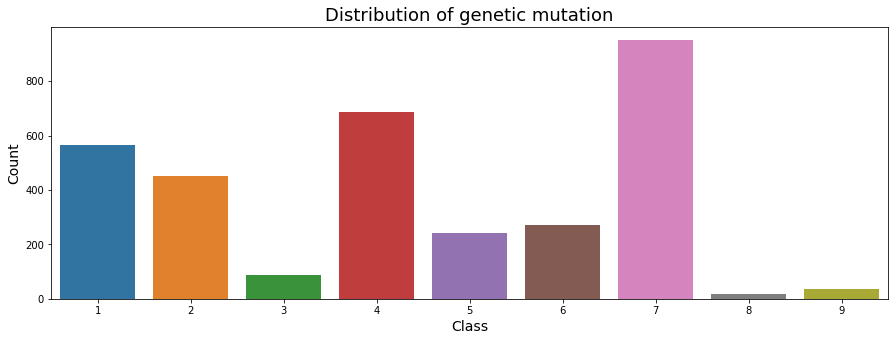

In [219]:
#There are total 9 classes into which gene has to be classified. Lets get the frequency of Gene in each class in Training Part

plt.figure(figsize=(15,5))
sns.countplot(x='Class',data=df_train)
plt.xlabel('Class',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Distribution of genetic mutation',fontsize=18)
plt.show()

Class 7 is clearly the most frequent one & Class  3, 8, and 9 are min. frequent

In [212]:
#Checking first 10 gene with maximun & minimum occurence in Training part
Gene_group = df_train.groupby("Gene")['Gene'].count()
minimam_occ_genes = Gene_group.sort_values(ascending=True)[:10]
maximum_occ_genes=Gene_group.sort_values(ascending=False)[:10]
print("Genes with maximum occurences\n",maximum_occ_genes)
print("\nGenes with minimum occurences\n", minimam_occ_genes)

Genes with maximum occurences
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       92
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64

Genes with minimum occurences
 Gene
KMT2B     1
RARA      1
CEBPA     1
CDKN2C    1
FOXO1     1
RICTOR    1
FUBP1     1
RAD54L    1
CDK8      1
GNA11     1
Name: Gene, dtype: int64


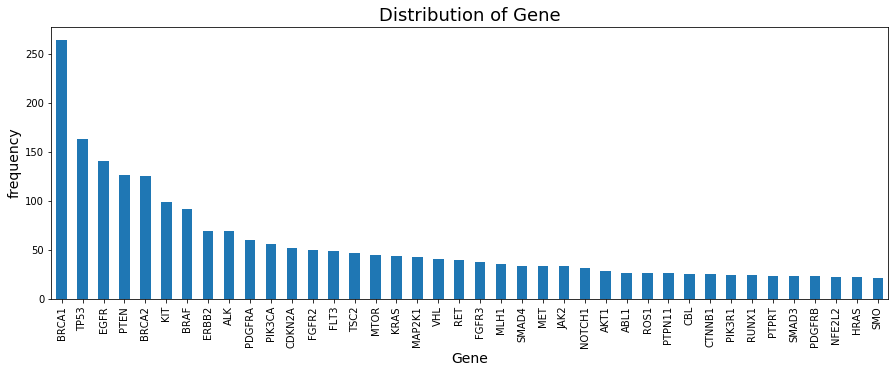

In [225]:
#This is the frequency distribution of the maximun occurence Gene
plt.figure(figsize=(15,5))
df_train.Gene.value_counts().head(40).plot.bar()
plt.xlabel('Gene',fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.title('Distribution of Gene',fontsize=18)
plt.show()

In [226]:
max_variation_train=df_train.Variation.value_counts().head(20)#checking the first 10 variation with maximum occurence 
max_variation_train.head(10)

Truncating Mutations    92
Deletion                74
Amplification           70
Fusions                 34
Overexpression           6
G12V                     4
T58I                     3
Q61H                     3
Q61L                     3
Q61R                     3
Name: Variation, dtype: int64

In [136]:
min_variation_train=df_train.Variation.value_counts().tail(10)##checking the first 10 variation with minimum occurence 
min_variation_train

E1586G                1
C242S                 1
I1018F                1
N198_F199delinsI      1
N375S                 1
R158H                 1
P151H                 1
MPRIP-NTRK1 Fusion    1
K2472T                1
W1782C                1
Name: Variation, dtype: int64

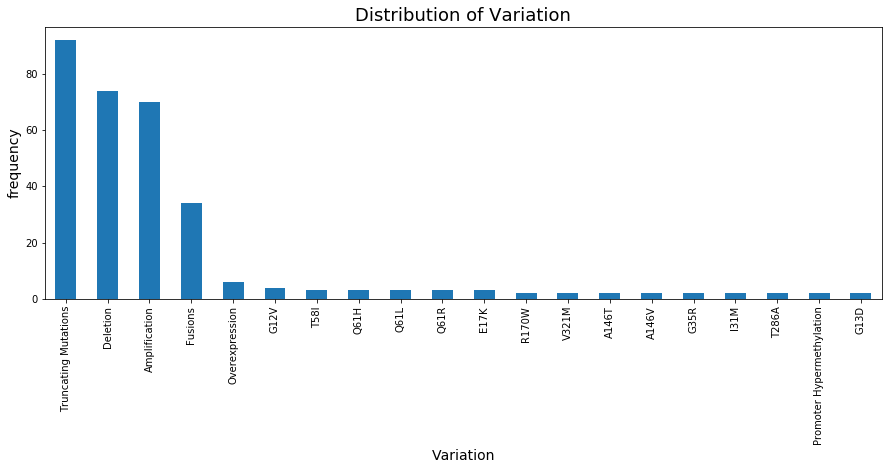

In [227]:
plt.figure(figsize=(15,5))#ploting maximum variance occurence 
max_variation_train.plot.bar()
plt.xlabel('Variation',fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.title('Distribution of Variation',fontsize=18)
plt.show()

Lets have a look at some genes that has highest number of occurrences in each class.

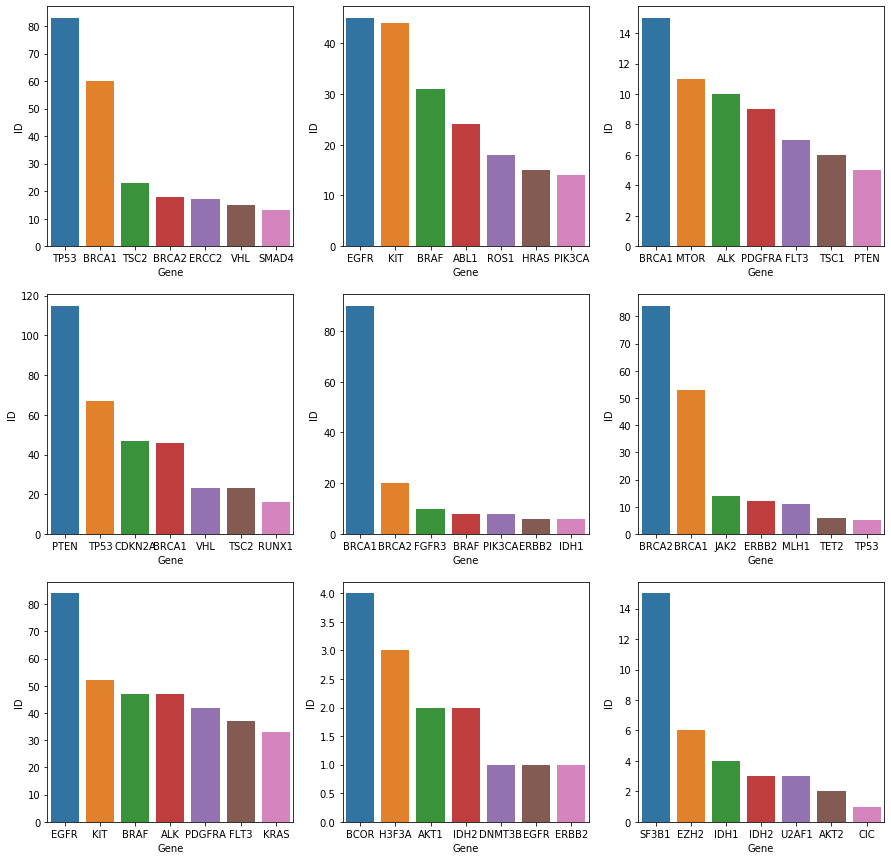

In [145]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        Gene_count = df_train[df_train["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_Gene = Gene_count.sort_values('ID', ascending=False)
        sorted_Gene_top_7 = sorted_Gene[:7]
        sns.barplot(x="Gene", y="ID", data=sorted_Gene_top_7, ax=axs[i][j])

from the above graph we conclude that BRCA1 gene highly present in class 5,SF3B1 gene highly present in class 9
PTEN are predominatly present in a single Class 4,TP53  are mainly shared between 2 classes 1 and 4,
Classes 8 and 9 contain none of the most frequent Genes.

Lets have a look at some Variation that has highest number of occurrences in each class.

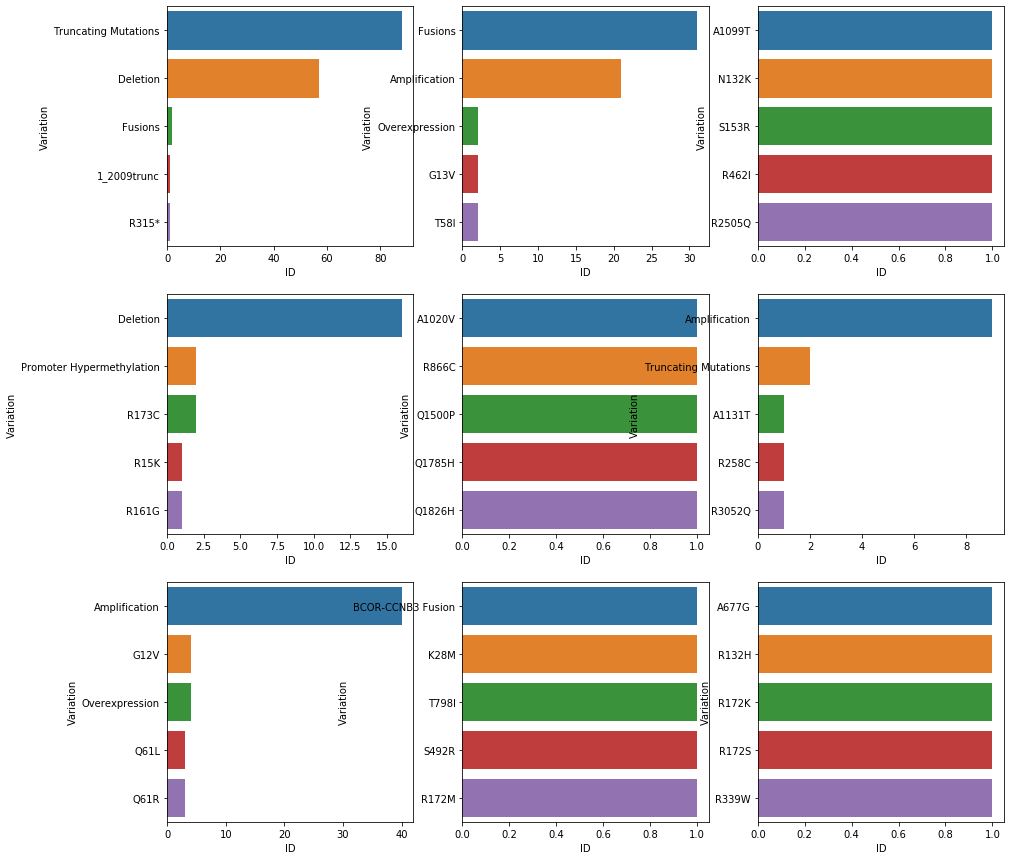

In [143]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))#now checking the variation
for i in range(3):
    for j in range(3):
        variation_count = df_train[df_train["Class"]==((i*3+j)+1)].groupby('Variation')["ID"].count().reset_index()
        sorted_variation = variation_count.sort_values('ID', ascending=False)
        sorted_variation_top_5 = sorted_variation[:5]
        sns.barplot(x="ID", y="Variation", data=sorted_variation_top_5, ax=axs[i][j])

## NLP

In [353]:
#!pip install auto-sklearn
#!pip install Cython numpy
!apt-get install swig-y
#import sklearn
#import autosklearn.classification as classifier

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [358]:
df_train1=df_train[['Class','Text']]# creating new dataframe 

In [361]:
df_train1["Word_Count"]=df_train1['Text'].apply(lambda x: len(str(x).split(" ")))

In [364]:
df_train1.head(6)

,Class,Text,Word_Count
0,1,Cyclin-dependent kinases (CDKs) regulate a var...,6105
1,2,Abstract Background Non-small cell lung canc...,5783
2,2,Abstract Background Non-small cell lung canc...,5783
3,3,Recent evidence has demonstrated that acquired...,5625
4,4,Oncogenic mutations in the monomeric Casitas B...,6248
5,4,Oncogenic mutations in the monomeric Casitas B...,6248


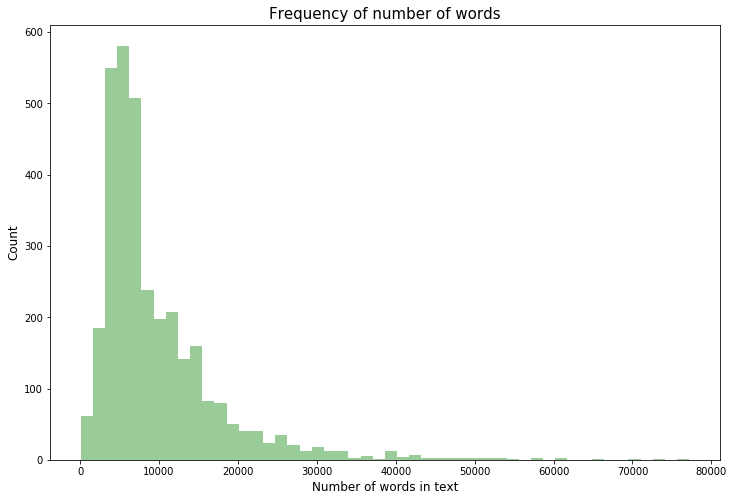

In [365]:
# Distribution of number of words in the text column
plt.figure(figsize=(12, 8))
sns.distplot(df_train1.Word_Count.values, bins=50, kde=False, color='green')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

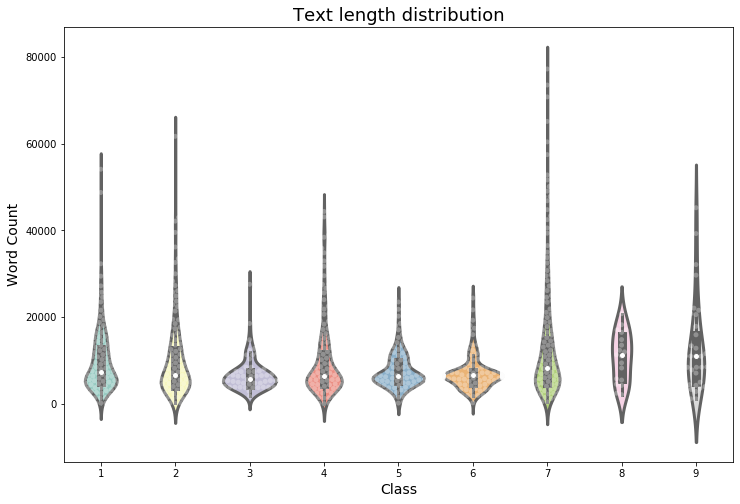

In [366]:
plt.figure(figsize=(12,8))
#gene_count_grp = df_train.groupby('Gene')["Word_Count"].sum().reset_index()
sns.violinplot(x="Class", y="Word_Count", data=df_train1, inner="box",palette="Set3",cut=2, linewidth=3)
sns.swarmplot(x="Class", y="Word_Count", data=df_train1, color="w",alpha=0.3);
plt.ylabel('Word Count', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Text length distribution", fontsize=18)
plt.show()

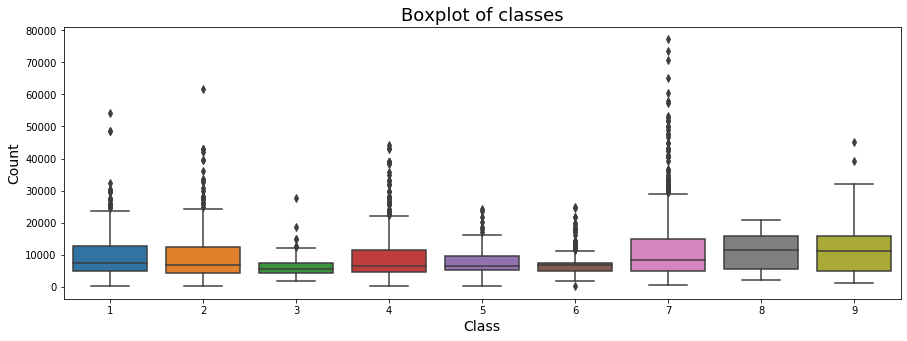

In [367]:
#using Boxplot to show  which class have maximum no word.
plt.figure(figsize=(15,5))
sns.boxplot(x="Class",y="Word_Count",data=df_train1)
plt.xlabel('Class',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title("Boxplot of classes",fontsize=18)
plt.show()

In [368]:
#Number of Numeric
df_train1['Numerics']=df_train1['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [371]:
df_train1

,Class,Text,Word_Count,Numerics
0,1,Cyclin-dependent kinases (CDKs) regulate a var...,6105,113
1,2,Abstract Background Non-small cell lung canc...,5783,144
2,2,Abstract Background Non-small cell lung canc...,5783,144
3,3,Recent evidence has demonstrated that acquired...,5625,187
4,4,Oncogenic mutations in the monomeric Casitas B...,6248,53
...,...,...,...,...
3316,4,Introduction Myelodysplastic syndromes (MDS) ...,11112,251
3317,1,Introduction Myelodysplastic syndromes (MDS) ...,6118,139
3318,1,The Runt-related transcription factor 1 gene (...,5119,115
3319,4,The RUNX1/AML1 gene is the most frequent targe...,4913,77


In [372]:
#Downloading Stopword Package
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [373]:
#Number of Stopword
df_train1['stopwords'] = df_train1['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [374]:
df_train1   

,Class,Text,Word_Count,Numerics,stopwords
0,1,Cyclin-dependent kinases (CDKs) regulate a var...,6105,113,1793
1,2,Abstract Background Non-small cell lung canc...,5783,144,1857
2,2,Abstract Background Non-small cell lung canc...,5783,144,1857
3,3,Recent evidence has demonstrated that acquired...,5625,187,1756
4,4,Oncogenic mutations in the monomeric Casitas B...,6248,53,2004
...,...,...,...,...,...
3316,4,Introduction Myelodysplastic syndromes (MDS) ...,11112,251,3453
3317,1,Introduction Myelodysplastic syndromes (MDS) ...,6118,139,1926
3318,1,The Runt-related transcription factor 1 gene (...,5119,115,1504
3319,4,The RUNX1/AML1 gene is the most frequent targe...,4913,77,1481


In [375]:
#Number of Special Character
df_train1['hastags'] = df_train1['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

In [376]:
df_train1

,Class,Text,Word_Count,Numerics,stopwords,hastags
0,1,Cyclin-dependent kinases (CDKs) regulate a var...,6105,113,1793,0
1,2,Abstract Background Non-small cell lung canc...,5783,144,1857,0
2,2,Abstract Background Non-small cell lung canc...,5783,144,1857,0
3,3,Recent evidence has demonstrated that acquired...,5625,187,1756,0
4,4,Oncogenic mutations in the monomeric Casitas B...,6248,53,2004,0
...,...,...,...,...,...,...
3316,4,Introduction Myelodysplastic syndromes (MDS) ...,11112,251,3453,0
3317,1,Introduction Myelodysplastic syndromes (MDS) ...,6118,139,1926,0
3318,1,The Runt-related transcription factor 1 gene (...,5119,115,1504,0
3319,4,The RUNX1/AML1 gene is the most frequent targe...,4913,77,1481,0


In [75]:
#Upercase Word
df_train1['upper']=df_train1['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [76]:
df_train1

,Class,Text,Word_Count,Numerics,stopwords,hastags,upper
0,1,Cyclin-dependent kinases (CDKs) regulate a var...,6105,113,1793,0,582
1,2,Abstract Background Non-small cell lung canc...,5783,144,1857,0,449
2,2,Abstract Background Non-small cell lung canc...,5783,144,1857,0,449
3,3,Recent evidence has demonstrated that acquired...,5625,187,1756,0,473
4,4,Oncogenic mutations in the monomeric Casitas B...,6248,53,2004,0,460
...,...,...,...,...,...,...,...
3316,4,Introduction Myelodysplastic syndromes (MDS) ...,11112,251,3453,0,928
3317,1,Introduction Myelodysplastic syndromes (MDS) ...,6118,139,1926,0,550
3318,1,The Runt-related transcription factor 1 gene (...,5119,115,1504,0,617
3319,4,The RUNX1/AML1 gene is the most frequent targe...,4913,77,1481,0,298


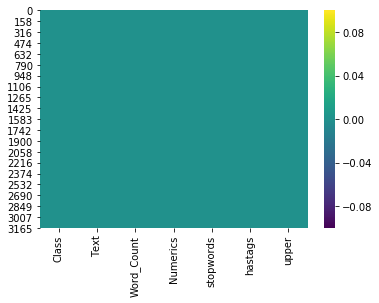

In [77]:
#Checking NaN Values #using heatmap we can see here there is no nan values present in each column
sns.heatmap(df_train1.isnull(), cmap='viridis')

#### Basic Pre-Processing

In [377]:
#Coverting text to Lower Case
df_train1['Text']=df_train1['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [282]:
df_train1

,ID,Gene,Variation,Class,Text,Word_Count
0,0,FAM58A,Truncating Mutations,1,cyclin-dependent kinases (cdks) regulate a var...,6105
1,1,CBL,W802*,2,abstract background non-small cell lung cancer...,5783
2,2,CBL,Q249E,2,abstract background non-small cell lung cancer...,5783
3,3,CBL,N454D,3,recent evidence has demonstrated that acquired...,5625
4,4,CBL,L399V,4,oncogenic mutations in the monomeric casitas b...,6248
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,introduction myelodysplastic syndromes (mds) a...,11112
3317,3317,RUNX1,A122*,1,introduction myelodysplastic syndromes (mds) a...,6118
3318,3318,RUNX1,Fusions,1,the runt-related transcription factor 1 gene (...,5119
3319,3319,RUNX1,R80C,4,the runx1/aml1 gene is the most frequent targe...,4913


In [65]:
#Removing Punctuation(removing full stop,question mark,commas,semi colon,exclamation mark,quotation marks,dashes,curly brackets)
wordcloud_train['Text'] = wordcloud_train['Text'].str.replace('[^\w\s]','')

In [68]:
wordcloud_train

,Class,Text,stopwords,Word_Count
0,1,cyclindependent kinases cdks regulate a variet...,1793,6105
1,2,abstract background nonsmall cell lung cancer ...,1857,5783
2,2,abstract background nonsmall cell lung cancer ...,1857,5783
3,3,recent evidence has demonstrated that acquired...,1756,5625
4,4,oncogenic mutations in the monomeric casitas b...,2004,6248
...,...,...,...,...
3316,4,introduction myelodysplastic syndromes mds are...,3453,11112
3317,1,introduction myelodysplastic syndromes mds are...,1926,6118
3318,1,the runtrelated transcription factor 1 gene ru...,1504,5119
3319,4,the runx1aml1 gene is the most frequent target...,1481,4913


In [69]:
#Removing Stopwords
wordcloud_train['Text'] = wordcloud_train['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [71]:
wordcloud_train['stopwords'] = wordcloud_train['Text'].apply(lambda x: len([x for x in x.split() if x in stop])) #checking stopwords

In [72]:
wordcloud_train# here we all remove stopword

,Class,Text,stopwords,Word_Count
0,1,cyclindependent kinases cdks regulate variety ...,0,6105
1,2,abstract background nonsmall cell lung cancer ...,0,5783
2,2,abstract background nonsmall cell lung cancer ...,0,5783
3,3,recent evidence demonstrated acquired uniparen...,0,5625
4,4,oncogenic mutations monomeric casitas blineage...,0,6248
...,...,...,...,...
3316,4,introduction myelodysplastic syndromes mds het...,0,11112
3317,1,introduction myelodysplastic syndromes mds het...,0,6118
3318,1,runtrelated transcription factor 1 gene runx1 ...,0,5119
3319,4,runx1aml1 gene frequent target chromosomal tra...,0,4913


In [75]:
#Checking all Rare Word present in text
freq1 = pd.Series(' '.join(wordcloud_train['Text']).split()).value_counts()[-10:]

In [76]:
freq1

gly751arg               1
egfrchr7                1
crecursor               1
antiphosphostat5ab      1
îpdz                    1
2ãtgfbr1                1
01ugml                  1
025â115                 1
p16ink4ainactivating    1
3sslabeled              1
dtype: int64

In [77]:
wordcloud_train['Text'] = wordcloud_train['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))#removing Rare word

In [81]:
wordcloud_train

,Class,Text,stopwords,Word_Count
0,1,cyclindependent kinases cdks regulate variety ...,0,6105
1,2,abstract background nonsmall cell lung cancer ...,0,5783
2,2,abstract background nonsmall cell lung cancer ...,0,5783
3,3,recent evidence demonstrated acquired uniparen...,0,5625
4,4,oncogenic mutations monomeric casitas blineage...,0,6248
...,...,...,...,...
3316,4,introduction myelodysplastic syndromes mds het...,0,11112
3317,1,introduction myelodysplastic syndromes mds het...,0,6118
3318,1,runtrelated transcription factor 1 gene runx1 ...,0,5119
3319,4,runx1aml1 gene frequent target chromosomal tra...,0,4913


In [ ]:
import nltk
nltk.download('punkt')

## Spelling Correction

In [117]:
import nltk.corpus 

In [125]:
!pip install textblob #not performing spell correction as it takes more time

In [89]:
wordcloud_train1=wordcloud_train[['Class','Text']]
wordcloud_train1

,Class,Text
0,1,cyclindependent kinases cdks regulate variety ...
1,2,abstract background nonsmall cell lung cancer ...
2,2,abstract background nonsmall cell lung cancer ...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas blineage...
...,...,...
3316,4,introduction myelodysplastic syndromes mds het...
3317,1,introduction myelodysplastic syndromes mds het...
3318,1,runtrelated transcription factor 1 gene runx1 ...
3319,4,runx1aml1 gene frequent target chromosomal tra...


### Advanced Text Processing

In [123]:
!pip install wordcloud #installing wordcloud package

### Word cloud

In [102]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [90]:
wordcloud_train1

,Class,Text
0,1,cyclindependent kinases cdks regulate variety ...
1,2,abstract background nonsmall cell lung cancer ...
2,2,abstract background nonsmall cell lung cancer ...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas blineage...
...,...,...
3316,4,introduction myelodysplastic syndromes mds het...
3317,1,introduction myelodysplastic syndromes mds het...
3318,1,runtrelated transcription factor 1 gene runx1 ...
3319,4,runx1aml1 gene frequent target chromosomal tra...


In [303]:
#separating classes 
class1DataFrame = wordcloud_train1[wordcloud_train1.Class == 1]
class2DataFrame = wordcloud_train1[wordcloud_train1.Class == 2]
class3DataFrame = wordcloud_train1[wordcloud_train1.Class == 3]
class4DataFrame = wordcloud_train1[wordcloud_train1.Class == 4]
class5DataFrame = wordcloud_train1[wordcloud_train1.Class == 5]
class6DataFrame = wordcloud_train1[wordcloud_train1.Class == 6]
class7DataFrame = wordcloud_train1[wordcloud_train1.Class == 7]
class8DataFrame = wordcloud_train1[wordcloud_train1.Class == 8]
class9DataFrame = wordcloud_train1[wordcloud_train1.Class == 9]

In [304]:
class1DataFrame

,Class,Text
0,1,cyclindependent kinases cdks regulate variety ...
7,1,cbl negative regulator activated receptor tyro...
16,1,determine residual cylindrical refractive erro...
37,1,sex cordâstromal tumors germcell tumors accoun...
38,1,sex cordâstromal tumors germcell tumors accoun...
...,...,...
3306,1,report two new runx1 mutations one patient con...
3307,1,runx genes come prominence recently roles esse...
3309,1,bcrabl fusion protein generated t922q34q11 chr...
3317,1,introduction myelodysplastic syndromes mds het...


## Convert Each Class to  String

In [305]:
class1 = class1DataFrame['Text'].tolist()
string1 = ''
for i in range(len(class1)):
    string1 += class1[i]
    
class2 = class2DataFrame['Text'].tolist()
string2 = ''
for i in range(len(class2)):
    string2 += class2[i]
    
class3 = class3DataFrame['Text'].tolist()
string3 = ''
for i in range(len(class3)):
    string3 += class3[i]
    
class4 = class4DataFrame['Text'].tolist()
string4 = ''
for i in range(len(class4)):
    string4 += class4[i]
    
class5 = class5DataFrame['Text'].tolist()
string5 = ''
for i in range(len(class5)):
    string5 += class5[i]
    
class6 = class6DataFrame['Text'].tolist()
string6 = ''
for i in range(len(class6)):
    string6 += class6[i]
    
class7 = class7DataFrame['Text'].tolist()
string7 = ''
for i in range(len(class7)):
    string7 += class7[i]
    
class8 = class8DataFrame['Text'].tolist()
string8 = ''
for i in range(len(class8)):
    string8 += class8[i]
    
class9 = class9DataFrame['Text'].tolist()
string9 = ''
for i in range(len(class9)):
    string9 += class9[i]
    

## Generate WordCloud for each Class

Class 1


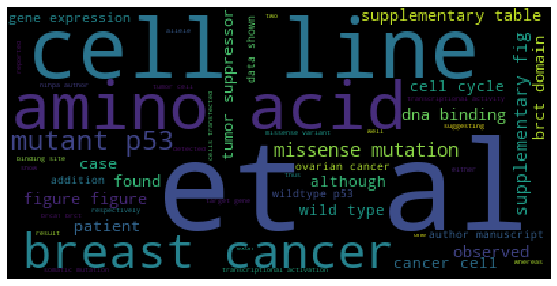

In [260]:
wordcloud1 = WordCloud(stopwords=STOPWORDS,max_words=50).generate(string1)
print("Class 1")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

Class 2


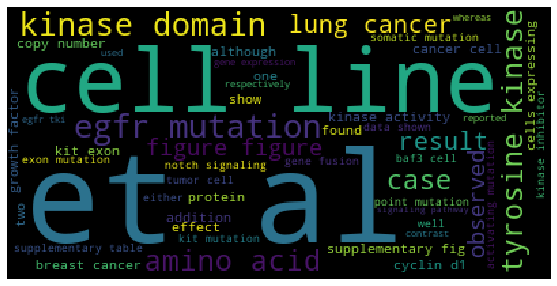

In [113]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,max_words=50).generate(string2)
print("Class 2")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

Class 3


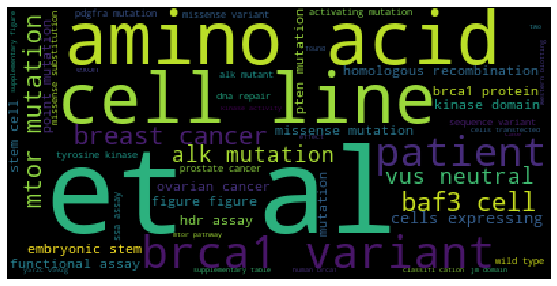

In [261]:
wordcloud3 = WordCloud(max_words=50).generate(string3)
print("Class 3")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

Class 4


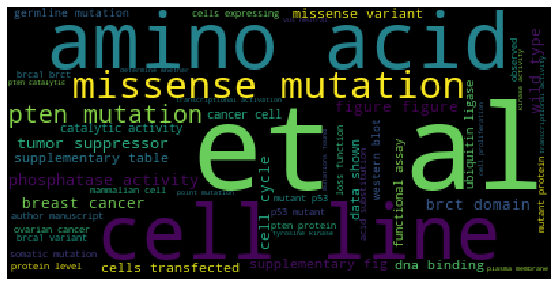

In [119]:
wordcloud4 = WordCloud(max_words=50).generate(string4)
print("Class 4")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud4)
plt.axis('off')
plt.show()

Class 5


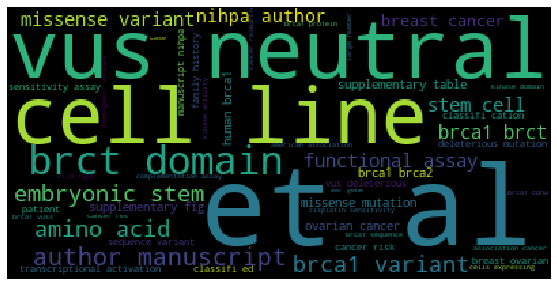

In [122]:
wordcloud5 = WordCloud(max_words=50).generate(string5)
print("Class 5")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud5)
plt.axis('off')
plt.show()

Class 6


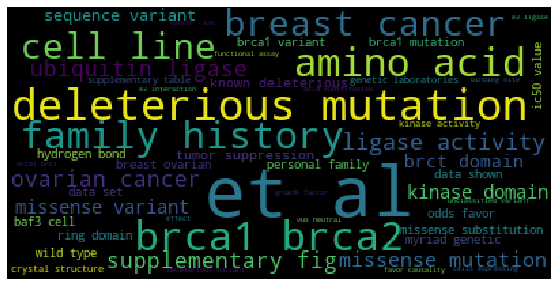

In [123]:
wordcloud6 = WordCloud(max_words=50).generate(string6)
print("Class 6")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud6)
plt.axis('off')
plt.show()

Class 7


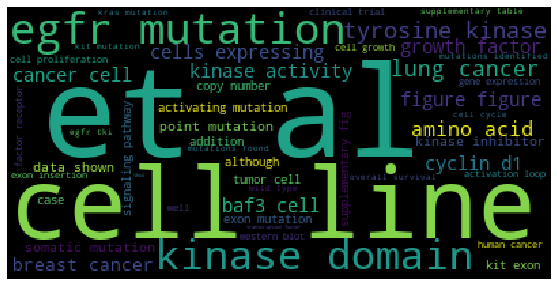

In [124]:
wordcloud7 = WordCloud(max_words=50).generate(string7)
print("Class 7")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud7)
plt.axis('off')
plt.show()

Class 8


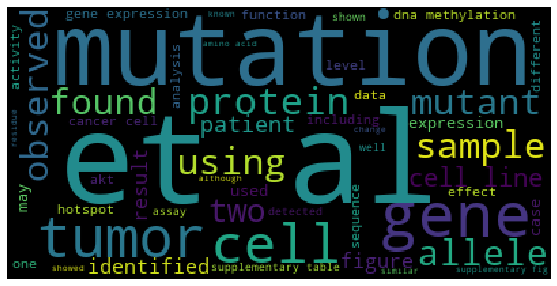

In [125]:
wordcloud8 = WordCloud(max_words=50).generate(string8)
print("Class 8")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud8)
plt.axis('off')
plt.show()

Class 9


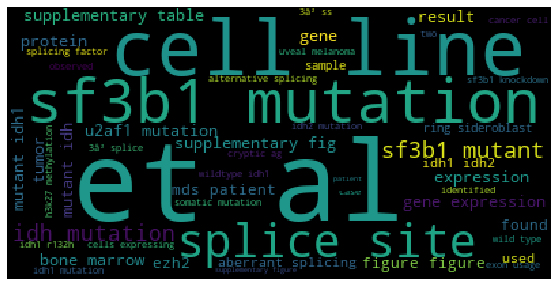

In [126]:
wordcloud9 = WordCloud(max_words=50).generate(string9)
print("Class 9")
plt.figure(figsize=(10,5))
plt.imshow(wordcloud9)
plt.axis('off')
plt.show()

Mutation, breast cancer, cell,amini acid seems to be commonly dominating in all classes

## Spliting Dataset into training & Testing Set

In [89]:
df_train.head(4)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...


In [178]:
df_test.head()

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [106]:
X=df_train['Text']

In [107]:
Y=df_train['Class']

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [109]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2652,)
(2652,)
(664,)
(664,)


In [110]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm

In [111]:
text_classifier = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()),     
                     ('clf', svm.LinearSVC())
])

In [112]:
text_classifier

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [113]:
text_classifier = text_classifier.fit(X_train,Y_train)

In [114]:
Y_pred = text_classifier.predict(X_test)

In [116]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(Y_test,Y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.52      0.59      0.55       114
           2       0.60      0.38      0.46        95
           3       0.67      0.24      0.35        17
           4       0.64      0.67      0.65       123
           5       0.39      0.26      0.31        50
           6       0.65      0.50      0.57        56
           7       0.67      0.87      0.76       196
           8       1.00      0.43      0.60         7
           9       0.67      0.67      0.67         6

    accuracy                           0.61       664
   macro avg       0.64      0.51      0.55       664
weighted avg       0.61      0.61      0.60       664



In [117]:
from sklearn.metrics import accuracy_score
print('Accuracy: \n', accuracy_score(Y_test,Y_pred))

Accuracy: 
 0.6129518072289156


## Prdicting Value for test Data

In [119]:
df_test

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...
...,...,...,...,...
5663,5663,SLC46A1,R113S,The realization in the late 1970s that RAS har...
5664,5664,FOXC1,L130F,Hemizygous deletions are common molecular abno...
5665,5665,GSS,R267W,All most R267W of has with to SMARTpool invest...
5666,5666,CTSK,G79E,Abstract Blood samples from 125 unrelated fami...


In [120]:
test_final=df_test['Text'].values

In [121]:
predicted_class = text_classifier.predict(test_final)

In [122]:
df_test['Predicted class']=predicted_class

In [123]:
df_test

,ID,Gene,Variation,Text,Predicted class
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,4
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,4
...,...,...,...,...,...
5663,5663,SLC46A1,R113S,The realization in the late 1970s that RAS har...,7
5664,5664,FOXC1,L130F,Hemizygous deletions are common molecular abno...,1
5665,5665,GSS,R267W,All most R267W of has with to SMARTpool invest...,2
5666,5666,CTSK,G79E,Abstract Blood samples from 125 unrelated fami...,7


In [124]:
#Creating Dummy variable for Predicted Class
dummies=pd.get_dummies(df_test['Predicted class'])

In [125]:
df_test=df_test.join(dummies)

In [126]:
df_test

,ID,Gene,Variation,Text,Predicted class,1,2,3,4,5,6,7,8,9
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7,0,0,0,0,0,0,1,0,0
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4,0,0,0,1,0,0,0,0,0
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,4,0,0,0,1,0,0,0,0,0
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7,0,0,0,0,0,0,1,0,0
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,5663,SLC46A1,R113S,The realization in the late 1970s that RAS har...,7,0,0,0,0,0,0,1,0,0
5664,5664,FOXC1,L130F,Hemizygous deletions are common molecular abno...,1,1,0,0,0,0,0,0,0,0
5665,5665,GSS,R267W,All most R267W of has with to SMARTpool invest...,2,0,1,0,0,0,0,0,0,0
5666,5666,CTSK,G79E,Abstract Blood samples from 125 unrelated fami...,7,0,0,0,0,0,0,1,0,0


In [127]:
submission_df=df_test[['ID',1,2,3,4,5,6,7,8,9]]
submission_df.columns=['ID','Class1','Class2','Class3','Class4','Class5','Class6','Class7','Class8','Class9']

In [128]:
submission_df

,ID,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9
0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0
2,2,0,0,0,1,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0
4,4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5663,5663,0,0,0,0,0,0,1,0,0
5664,5664,1,0,0,0,0,0,0,0,0
5665,5665,0,1,0,0,0,0,0,0,0
5666,5666,0,0,0,0,0,0,1,0,0


In [184]:
df_train.head(3)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...


In [ ]:
Y_true = all_data['Class'].values
df_train['Gene']      = df_train['Gene'].str.replace('\s+', '_')
df_train['Variation'] = df_train['Variation'].str.replace('\s+', '_')

In [164]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)    

In [165]:
tfidf = count_vectorizer.fit_transform(df_train['Text'])

In [147]:
len(count_vectorizer.get_feature_names())

279980

In [161]:
from sklearn.ensemble import RandomForestClassifier